## Why we call it "regression"?

We've all likely heard of linear regression, but where does the word regression come from? Well, apparently it comes from Francis Galton's 1886 paper, ["Regression towards mediocrity in hereditary stature."](http://galton.org/essays/1880-1889/galton-1886-jaigi-regression-stature.pdf) Today, we often hear the term "regression to the mean," which essentially comes from this paper. Pearson, Galton's disciple, expanded on the work and examined how a father's height could predict the height of his son. Let's get the data (http://www.math.uah.edu/stat/data/Pearson.csv) and take a look at what he found. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv("Pearson.csv")
df.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


Let's just make a simple plot of `Father` (the height of the father) vs `Son` (the height of the son) 

In [3]:
x = df['Father']
y = df['Son']

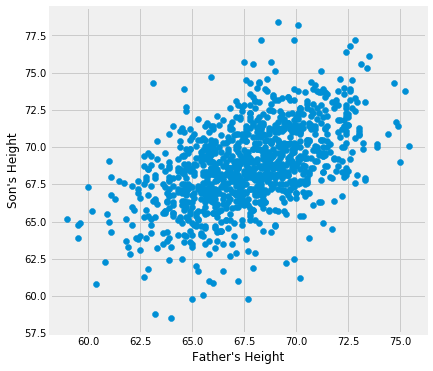

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.xlabel("Father's Height")
plt.ylabel("Son's Height");

The two variables look pretty correlated. Let's measure the correlation using numpy:

In [5]:
np.corrcoef(x,y)[1,0]

0.50116268080759108

I always forget the specific formulas for the least squares linear regression coefficients, but I am going to give an informal argument to help myself remember them. And hopefully, this may give you some (again, informal) insight into why the eequations are the way they are.

We are trying to essentially predict the height of the son from the height of the father. Naively, if a father is two standard deviations above the mean in height, we might expect that the son is two standard deviations above the mean in height. To put this mathematically:

$$ 
\frac{y-\bar y}{s_y} = \frac{x-\bar x}{s_x},
$$

where $x$ is the father's height, and $y$ is the son's height. All we are doing is just setting the standardized scores equal to each other. Now, let's solve for $y$ and we get the equation of a line:

$$ 
\begin{align*} 
y &= \frac{s_y}{s_x}{(x - \bar x)} + \bar y, \\
y &= \left(\frac{s_y}{s_x}\right){x} + \left({\bar y}-{\frac{s_y}{s_x}{\bar x}}\right),
\end{align*} 
$$

which is just an equation of the form $y = ax+b$. Let's now plot this line:

In [6]:
a = (y.std())/(x.std())
a

1.0256268717321586

In [7]:
b = y.mean() - (((y.std())/(x.std()))*x.mean())
b

-0.7371990478268771

So our line looks like $y = 1.03x - 0.73$. Let's plot it:

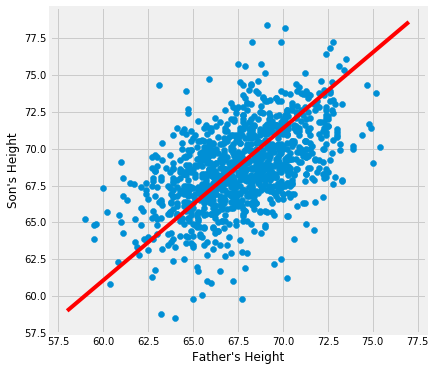

In [8]:
z = np.linspace(58, 77, 30)

plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.plot(z, 1.03*z - 0.73, 'r')
plt.xlabel("Father's Height")
plt.ylabel("Son's Height");

This look's like a pretty good fit to the data. However, there is an issue on both the left and right extremes of the graph. Look, for example, at a father of height around 60"; the line consistently underestimates how tall his son will be. At the right side of the graph, the line consistently overestimates the height for sons of fathers around 75" tall. That is to say, the kids of short and tall fathers *regress towards the mean*. 

So our original equation was wrong. A father two standard deviations above the mean will probably not have a son quite as tall. In fact, we would only predict the son is two standard devaitions above the mean if the correlation $r$ was $1$. Instead, since the correlation in this case is $0.5$, we might predict the son will only be one (one half of two) standard deviations above the mean. Let's alter our equation to reflect this:

$$ 
\frac{y-\bar y}{s_y} = r\frac{x-\bar x}{s_x},
$$

which leads to a new equation for the line:

$$ 
\begin{align*} 
y &= \frac{s_y}{s_x}{r (x - \bar x)} + \bar y, \\
y &= \left(\frac{s_y}{s_x}\right){rx} + \left({\bar y}-{\frac{s_y}{s_x}{r\bar x}}\right),
\end{align*} 
$$

Let's calculate these new coefficients using $r=0.50$ as we found earlier:

In [9]:
r = 0.50

In [10]:
a_new = r*(y.std())/(x.std())
a_new

0.5128134358660793

In [11]:
b_new = y.mean() - (((y.std())/(x.std()))*x.mean()*r)
b_new

33.97351550391587

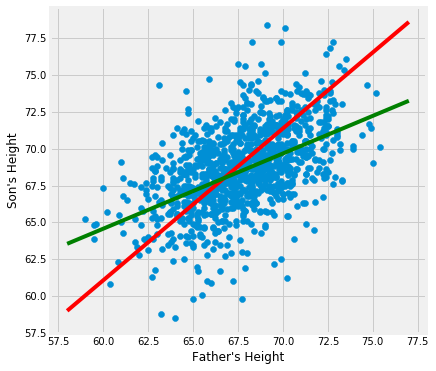

In [12]:
z = np.linspace(58, 77, 30)

plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.plot(z, 1.03*z - 0.73, 'r')
plt.plot(z, 0.51*z + 33.97, 'g')
plt.xlabel("Father's Height")
plt.ylabel("Son's Height");

The line is green is just our usual least square's line! Let's run the linear regression in scikit_learn to make sure we were right:

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x = x.reshape(-1, 1)
lin_reg.fit(x, y)

/Users/matthewrobinson/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# print the coefficients
print(lin_reg.intercept_)
print(lin_reg.coef_)

33.8928005407
[ 0.51400591]


Which is we got (off by a bit because of some rounding on our part). Thus, we have found the formulas for the coefficients without having to use any maximum likelihood arguments or anything.